In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import datetime
import logging
from typing import Dict, Optional

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.economic_analysis import *

## Economic Indicators 
 fetche and processes various economic indicators to analyze their influence on oil prices.

- GDP growth
- Inflation rates
- Unemployment rates
- Renewable energy consumption
- Environmental tax revenue
- Trade balance
- Natural gas usage
- Exchange rates for major currencies

In [4]:

logger.info("Starting data collection...")
indicator_data = fetch_all_indicators()
    
# Merge all indicators
merged_data = merge_indicators(indicator_data)

2024-11-09 21:59:06,669 - INFO - Starting data collection...
2024-11-09 21:59:06,698 - INFO - Successfully fetched GDP Growth (%) data
2024-11-09 21:59:06,704 - INFO - Successfully fetched Inflation Rate (%) data
2024-11-09 21:59:06,710 - INFO - Successfully fetched Unemployment Rate (%) data
2024-11-09 21:59:06,716 - INFO - Successfully fetched Exchange Rate (Local Currency per USD) data
2024-11-09 21:59:06,723 - INFO - Successfully fetched Renewable Energy Consumption (%) data
2024-11-09 21:59:06,730 - INFO - Successfully fetched Environmental Tax Revenue (% of GDP) data
2024-11-09 21:59:06,736 - INFO - Successfully fetched Net Trade (BoP, current US$) data
2024-11-09 21:59:06,742 - INFO - Successfully fetched Natural Gas Electricity Production (%) data
2024-11-09 21:59:06,758 - INFO - Successfully merged all indicators


In [5]:
# Display summary of collected data
for name, df in indicator_data.items():
    print(df.head())
        
print("\nMerged Data Summary:")
merged_data.head()
print(f"Final Shape: {merged_data.shape}")

                country       date  GDP Growth (%)
1  United Arab Emirates 2022-01-01    5.070640e+11
2  United Arab Emirates 2021-01-01    4.151788e+11
3  United Arab Emirates 2020-01-01    3.494730e+11
4  United Arab Emirates 2019-01-01    4.179897e+11
5  United Arab Emirates 2018-01-01    4.270494e+11
                country       date  Inflation Rate (%)
1  United Arab Emirates 2022-01-01          117.541088
2  United Arab Emirates 2021-01-01          112.127688
3  United Arab Emirates 2020-01-01          112.143231
4  United Arab Emirates 2019-01-01          114.524661
5  United Arab Emirates 2018-01-01          116.779773
                country       date  Unemployment Rate (%)
1  United Arab Emirates 2022-01-01                  2.873
2  United Arab Emirates 2021-01-01                  3.105
3  United Arab Emirates 2020-01-01                  4.294
4  United Arab Emirates 2019-01-01                  2.331
5  United Arab Emirates 2018-01-01                  2.236
                

In [6]:
merged_data.head()

,country,date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%)
0,China,1988-01-01,3.123536e+11,33.187245,NaN,3.722100,NaN,NaN,-4.060000e+09,0.376552
9,China,1989-01-01,3.477681e+11,39.242469,NaN,3.765108,NaN,NaN,-4.927000e+09,0.634223
18,China,1990-01-01,3.608579e+11,40.440263,NaN,4.783208,33.9,NaN,1.066800e+10,0.446023
27,China,1991-01-01,3.833733e+11,41.878596,2.37,5.323392,33.1,NaN,1.160100e+10,0.358458
36,China,1992-01-01,4.269157e+11,44.539554,2.37,5.514592,32.8,NaN,4.998000e+09,0.327158


In [7]:
merged_data.tail()

,country,date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%)
278,United States,2018-01-01,2.065652e+13,115.157303,3.896,1.0,9.9,0.713,-5.786000e+11,31.942161
287,United States,2019-01-01,2.152140e+13,117.244195,3.669,1.0,10.2,0.713,-5.593940e+11,31.942161
296,United States,2020-01-01,2.132295e+13,118.690502,8.055,1.0,11.0,0.713,-6.536940e+11,31.942161
305,United States,2021-01-01,2.359403e+13,124.266414,5.349,1.0,10.9,0.713,-8.480720e+11,31.942161
314,United States,2022-01-01,2.574411e+13,134.211206,3.650,1.0,10.9,0.713,-9.447700e+11,31.942161


In [30]:
merged_data.info()

<class 'wbdata.client.DataFrame'>
Index: 315 entries, 0 to 314
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   country                                 315 non-null    object        
 1   Date                                    315 non-null    datetime64[ns]
 2   GDP Growth (%)                          315 non-null    float64       
 3   Inflation Rate (%)                      315 non-null    float64       
 4   Unemployment Rate (%)                   312 non-null    float64       
 5   Exchange Rate (Local Currency per USD)  315 non-null    float64       
 6   Renewable Energy Consumption (%)        313 non-null    float64       
 7   Environmental Tax Revenue (% of GDP)    291 non-null    float64       
 8   Net Trade (BoP, current US$)            315 non-null    float64       
 9   Natural Gas Electricity Production (%)  315 non-null    float64

In [ ]:
numeric_columns = merged_data.select_dtypes(include='number').columns
#merged_data.fillna(merged_data.median(), inplace=True)
merged_data[numeric_columns] = merged_data[numeric_columns].fillna(merged_data[numeric_columns].median())


In [33]:
merged_data.head()

,country,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%),year
0,China,1988-01-01,3.123536e+11,33.187245,5.629,3.722100,1.1,1.391,-4.060000e+09,0.376552,1988
9,China,1989-01-01,3.477681e+11,39.242469,5.629,3.765108,1.1,1.391,-4.927000e+09,0.634223,1989
18,China,1990-01-01,3.608579e+11,40.440263,5.629,4.783208,33.9,1.391,1.066800e+10,0.446023,1990
27,China,1991-01-01,3.833733e+11,41.878596,2.370,5.323392,33.1,1.391,1.160100e+10,0.358458,1991
36,China,1992-01-01,4.269157e+11,44.539554,2.370,5.514592,32.8,1.391,4.998000e+09,0.327158,1992


In [34]:
merged_data.isnull().sum()

country                                   0
Date                                      0
GDP Growth (%)                            0
Inflation Rate (%)                        0
Unemployment Rate (%)                     0
Exchange Rate (Local Currency per USD)    0
Renewable Energy Consumption (%)          0
Environmental Tax Revenue (% of GDP)      0
Net Trade (BoP, current US$)              0
Natural Gas Electricity Production (%)    0
year                                      0
dtype: int64

In [ ]:
# merged_data.rename(columns={'date': 'Date'}, inplace=True)

In [ ]:
# # to datetime
# merged_data['Date'] = pd.to_datetime(merged_data['Date'])
# oil_prices_df['Date'] = pd.to_datetime(oil_prices_df['Date'])

# #extract year
# merged_data['year'] = merged_data['Date'].dt.year
# oil_prices_df['year'] = oil_prices_df['Date'].dt.year 

In [36]:
# # Merging on Date column
# merged_df = pd.merge(merged_data, oil_prices_df, on='year', how='left')  # 'how' can be 'inner', 'outer', 'left', or 'right'

# print(merged_df)

In [47]:
final_df = merge_with_oil_prices(merged_data, oil_prices_df)

In [48]:
final_df.head()

,country,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%),year,Price
0,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.95
1,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.08
2,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.90
3,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,16.88
4,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,16.65


In [44]:
 # Merge with oil prices
final_df = merge_with_oil_prices(merged_data, oil_prices_df)

In [45]:
final_df.head()

,country,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%),year,Price
0,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.95
1,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.08
2,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.90
3,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,16.88
4,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,16.65


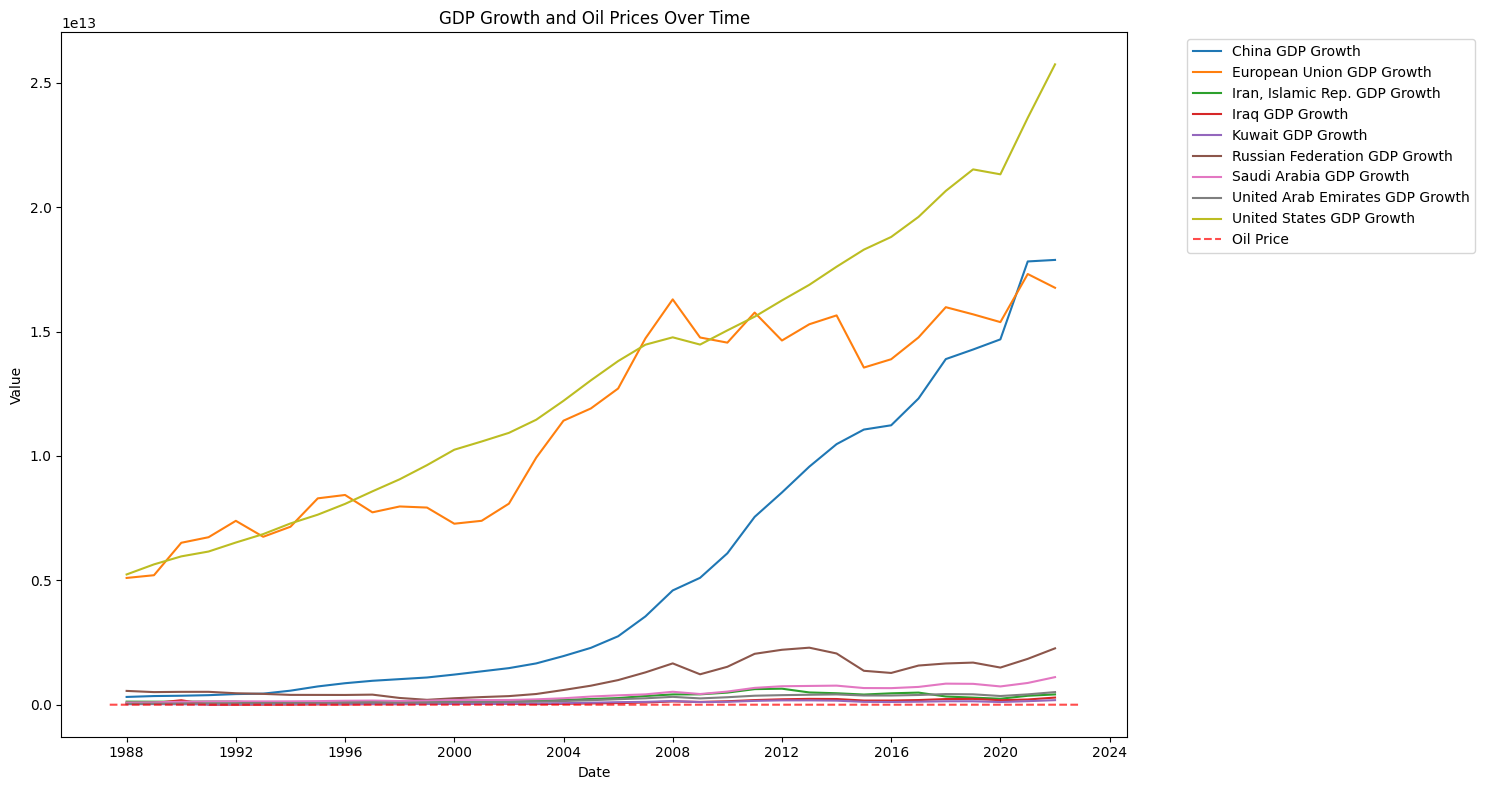

2024-11-09 22:36:53,170 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-09 22:36:53,188 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


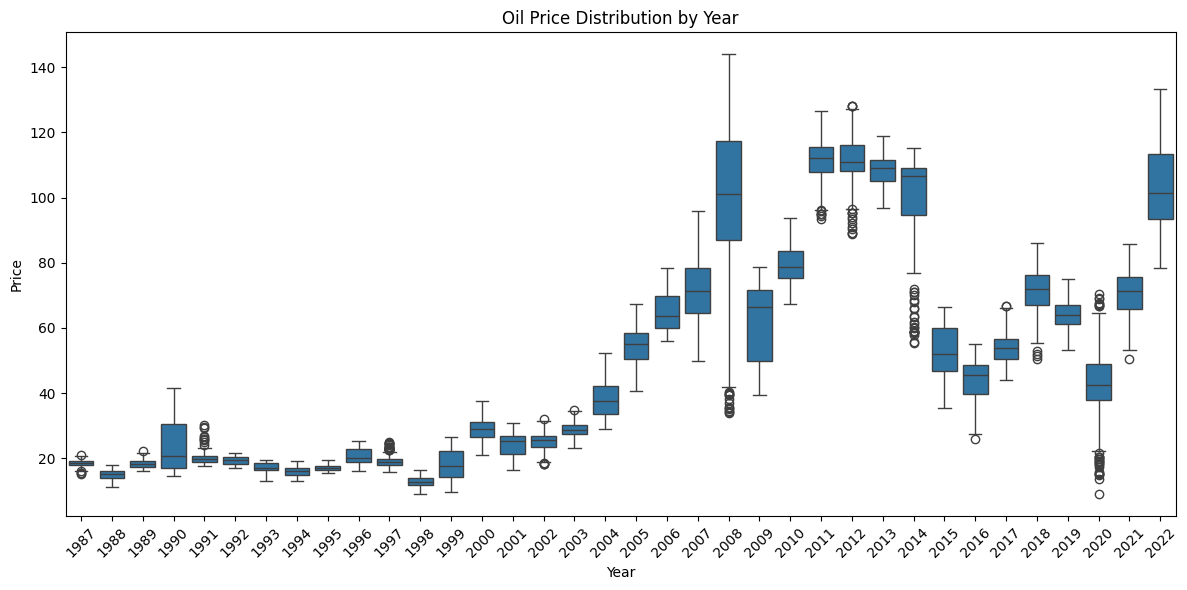

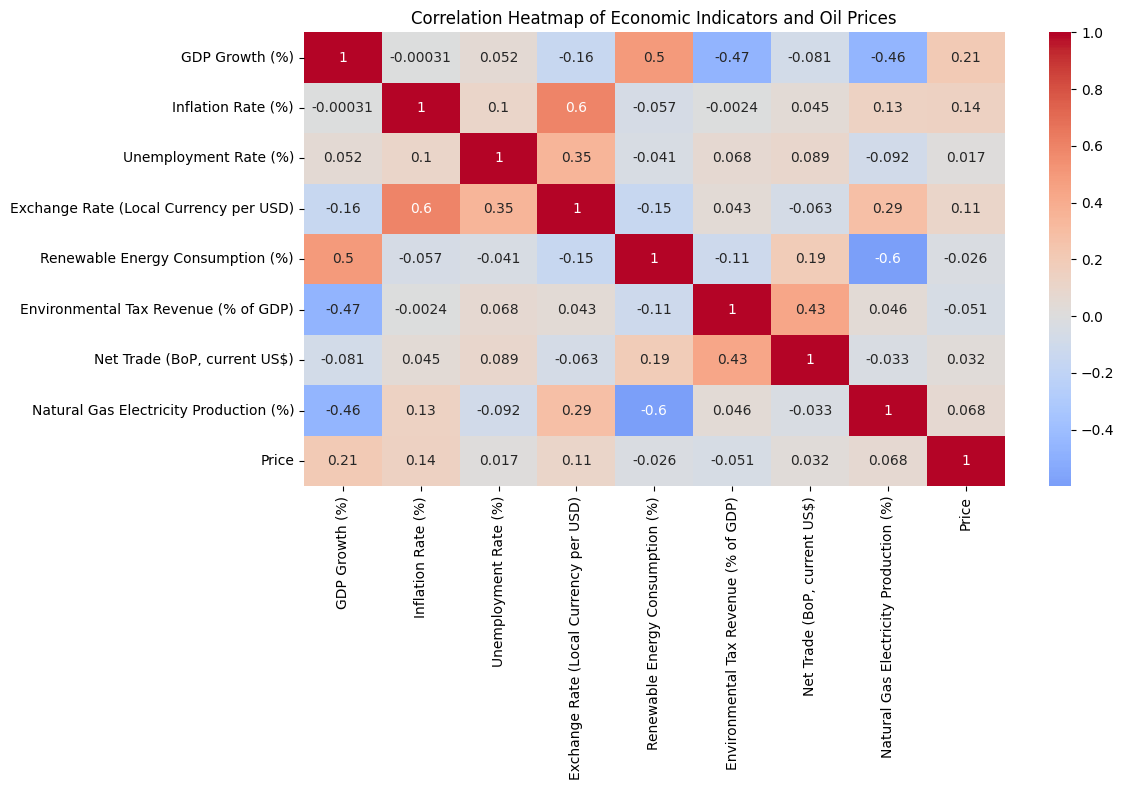

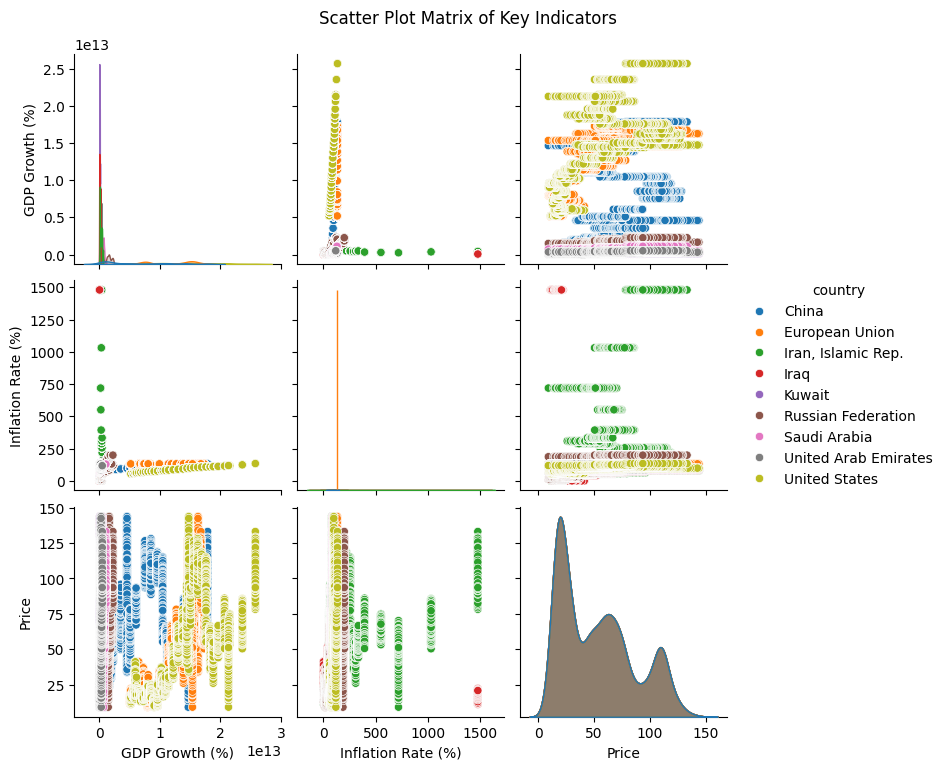

In [46]:
# Create visualizations
create_visualizations(final_df, oil_prices_df)

In [29]:
# Perform correlation analysis
correlation_results = perform_correlation_analysis(final_df)

NameError: name 'stats' is not defined

In [ ]:
# Plot correlation analysis results
plot_correlation_analysis(correlation_results)

In [ ]:
# Print detailed correlation results
print("\nDetailed Correlation Analysis Results:")
print(correlation_results.sort_values('abs_correlation', ascending=False)
          .to_string(index=False))

In [ ]:
# Print summary of strongest correlations
print("\nStrongest Correlations with Oil Prices:")
strong_correlations = correlation_results[
     correlation_results['correlation_strength'] == 'Strong'
].sort_values('abs_correlation', ascending=False)
print(strong_correlations.to_string(index=False))

In [ ]:
# Step 15: Analyze correlation
correlation = final_df['oil_price_max'].corr(final_df['GDP Growth (%)'])
print(f"Correlation between Brent Oil Prices and GDP Growth: {correlation:.2f}")

# Step 16: Visualize the relationship
plt.figure(figsize=(12, 6))
plt.plot(final_df['GDP Growth (%)'], final_df['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. GDP Growth Rates')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()

In [ ]:
# Step 15: Analyze correlation
correlation = final_df['oil_price_max'].corr(final_df['Inflation Rate (%)'])
print(f"Correlation between Brent Oil Prices and Inflation Rate: {correlation:.2f}")

# Optionally, visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(final_df['Inflation Rate (%)'], final_df['Inflation Rate (%)'], alpha=0.5)
plt.title('Brent Oil Prices vs. Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample code to generate the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP Growth (%)', y='oil_price_max', data=final_df, color='blue', s=50, alpha=0.6)
sns.regplot(x='GDP Growth (%)', y='oil_price_max', data=final_df, scatter=False, color='red', ci=None)  # Adds a regression line

# Adding titles and labels
plt.title('GDP Rate vs Oil Price')
plt.xlabel('GDP Rate')
plt.ylabel('Oil Price')
plt.grid(True)
plt.show()


In [ ]:
# Step 15: Analyze correlation
correlation = merged_data['Price'].corr(merged_data['GDP Growth (%)'])
print(f"Correlation between Brent Oil Prices and GDP Growth: {correlation:.2f}")

# Step 16: Visualize the relationship
plt.figure(figsize=(12, 6))
plt.plot(merged_data['GDP Growth (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. GDP Growth Rates')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()